<center><h1 style="font-size:2em;color:#2467C0;">Lernkontrolle 03.08.23 </h1></center>

# Aufgabe 1 - GIT

Wie bereits im Github Repository der Lernkontrolle beschrieben, bearbeite dieses Jupyter Notebook innerhalb eines Repos, welches ein "Fork" des AUfgaben-Repositories ist.

Wenn du ferti mit den Aufgaben in diesem Notebook bist, zeichne alle deine Änderungen in einem commit auf, und lade deine neue Version wieder auf deinem Remote Repository hoch.

Füge hier den Link zu deinem Github Repository ein, in welchem deine Lösung hinterlegt ist. (10p)

In [2]:
# Link zum Github Repo mit deiner Lösung:
# 

# Aufgabe 2 - Pandas und Diagramme

**a)** Lade den im Github Repository bereitgestellten Datensatz `"data.csv"` in ein DataFrame. Wenn du das Repository geklont hast und diesen Ordner in VSCode geöffnet hast, sollte der Datensatz bereits im Arbeitsverzeichnis liegen. Lass dir die ersten 5 Zeilen des DataFrames ausgeben. (2p)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

**b)** Wir wollen wissen, um was für Daten es sich handelt. Finde heraus wie viele Variablen (Spalten) und wie viele Beobachtungen (Zeilen) es gibt. Finde auch heraus, ob es irgendwo fehlende Werte gibt. (6p).

In [24]:
df = pd.read_csv("data.csv")
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710 entries, 0 to 4709
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          4710 non-null   int64 
 1   DayOfWeek      4710 non-null   int64 
 2   Date           4710 non-null   object
 3   Sales          4710 non-null   int64 
 4   Customers      4710 non-null   int64 
 5   Open           4710 non-null   int64 
 6   Promo          4710 non-null   int64 
 7   StateHoliday   4710 non-null   object
 8   SchoolHoliday  4710 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 331.3+ KB
None


In [26]:
print(df.shape)#4710 Zeilen , 9 Spalten

(4710, 9)


In [27]:
df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**c)** Lasse dir den durchschnittlichen Umsatz (`Sales`) pro Wochentag (`DayOfWeek`) in einem Balkendiagramm darstellen. Versehe es mit Achsenbeschriftungen und einem Diagrammtitel (6p).

Beispiel: (Muss nicht exakt gleich aussehen)

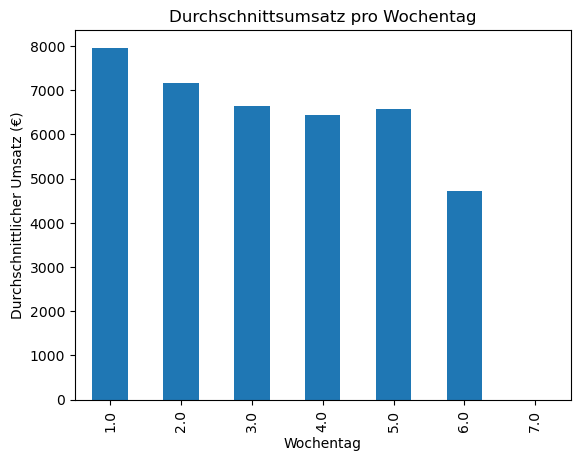

<Axes: title={'center': 'Durchschnittlicher Umsatz pro Wochentag'}, xlabel='Wochentag', ylabel='Durchschnittlicher Umsatz (Euro)'>

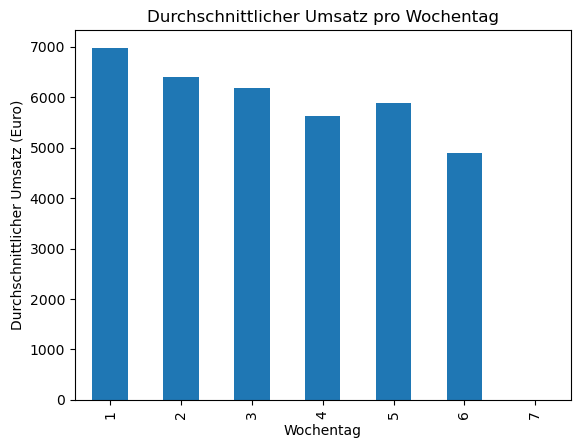

In [28]:

df.groupby('DayOfWeek')['Sales'].mean().plot(kind='bar',
                                             xlabel='Wochentag',
                                             ylabel='Durchschnittlicher Umsatz (Euro)', 
                                             title='Durchschnittlicher Umsatz pro Wochentag')



**d)** Stelle nun den durchschnittlichen Umsatz pro Geschäft (`"Store"`) als Kreisdiagramm dar und wende für die Tortenstücke eine anderes Farbschema an, als das Standard Schema. Versehe auch dieses Diagramm mit einem Titel. (8p)

<Axes: title={'center': 'Durchschnittlicher Umsatz pro Geschäft'}, ylabel='Sales'>

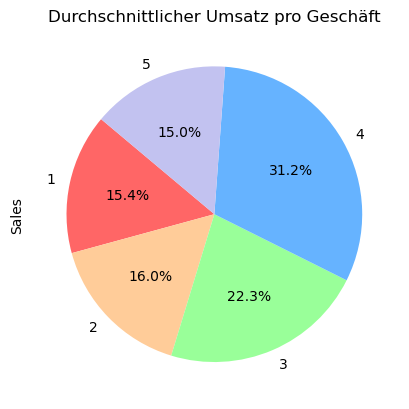

In [30]:

df.groupby('Store')['Sales'].mean().plot(kind='pie',
                                                             colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#dfff80', '#ff9999', '#ff00ff'], 
                                                             autopct='%1.1f%%', 
                                                             startangle=140, title='Durchschnittlicher Umsatz pro Geschäft')
                                                             
#Es werden nur 5 Farben benötigt und im Diagramm verwendet weil es 5 Bereiche sind, nach Bedarf kann ich Farben austauschen. 
                                                                                                                   

# Aufgabe 2 - Widgets

**a)** Erstelle eine Funktion, welche einen Preis, eine Stückzahl und einen Mehrwertsteuersatz als Argumente annimmt. Der Mehrwertsteuersatz soll standardmäßig den Wert `0.17` bekommen. Die Funktion soll dann sowohl den Brutto-Gesamtpreis als auch den Netto-Gesamtpreis (nach Steuer-Abzug), und auch den Betrag der Mehrwertsteuer als 3-Werte Tupel zurückgeben.

Mache die Funktion anschließend interaktiv, sodass man die Stückzahl und den Preis (z.B. per Slider) einstellen kann. Es sollten Preise von 0 bis 100 € in 5 Cent Schritten darstellbar sein, sowie Anzahlen von 1 bis 100 (ohne Kommastellen). (8p)

2 Bonuspunkte: Verwende für den Mehrwertsteuersatz ein anderes Widget, bei dem man die Zahl direkt als Text in ein Feld eingeben kann (Schaue dafür in der Dokumentation von ipywidgets, welches in Frage kommen könnte).

2 Bonuspunkte: Printe zusätzlich zum Rückgabewert der Funktion einen schönen Format-String, der die einzelnen Werte anzeigt, die berechnet wurden (siehe Beispiel).

Beispiel:

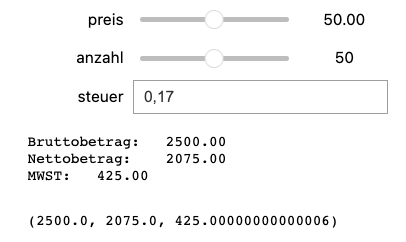

In [31]:
import ipywidgets as widgets

def berechne_preise(preis, stueckzahl, mehrwertsteuersatz=0.17):
    nettogesamtpreis = preis * stueckzahl
    mwst_betrag = nettogesamtpreis * mehrwertsteuersatz
    bruttogesamtpreis = nettogesamtpreis + mwst_betrag
    result = (bruttogesamtpreis, nettogesamtpreis, mwst_betrag)
    format_string = f"Bruttobetrag: {bruttogesamtpreis:.2f} Euro\nNettobetrag: {nettogesamtpreis:.2f} Euro\nMWST: {mwst_betrag:.2f} Euro\nDrei-Werte Tupel: {result}"
    print(format_string)
    return result

preis_slider = widgets.FloatSlider(value=1.0, min=0, max=100, step=0.05, description='Preis (Euro)')
stueckzahl_slider = widgets.IntSlider(value=1, min=1, max=100, description='Stückzahl')
mehrwertsteuersatz_widget = widgets.FloatText(value=0.17, description='Mehrwertsteuersatz')

interact_output = widgets.interactive(berechne_preise, preis=preis_slider, stueckzahl=stueckzahl_slider, mehrwertsteuersatz=mehrwertsteuersatz_widget)

interact_output


interactive(children=(FloatSlider(value=1.0, description='Preis (Euro)', step=0.05), IntSlider(value=1, descri…

**b)** Erstelle eine Funktion, welche ein Argument `promo` annimmt, welches entweder `True` oder `False` ist. Die Funktion soll sich von dem in Aufgabe 1 eingelesenen DataFrame nur die Zeilen raussuchen, in welchen die "Promo" Spalte mit der übergebenen Variable `promo` übereinstimmt. Von diesem Subset soll ein Scatterplot erstellt werden mit `"Customers"` auf der x-Achse und `"Sales"` auf der y-Achse. Fixiere die x-Achsen Limits bei (0, 2300) und die y-Achsen Limits bei (0, 18000).

Mache anschließend die  Funktion interaktiv, sodass man den Wert für `promo` in einer Dropdown Liste auswählen kann, und anschließend das Diagramm entsprechend aktualisiert wird. (10p)

2 Bonuspunkte: Wenn Promo `True` ist, sollen die Punkte rot sein. Wenn Promo `False` ist, sollen die Punkte blau sein.

Beispiel:

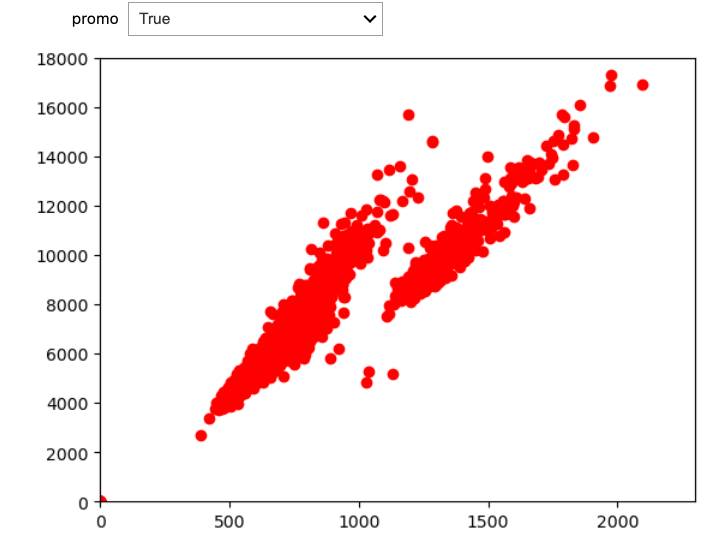

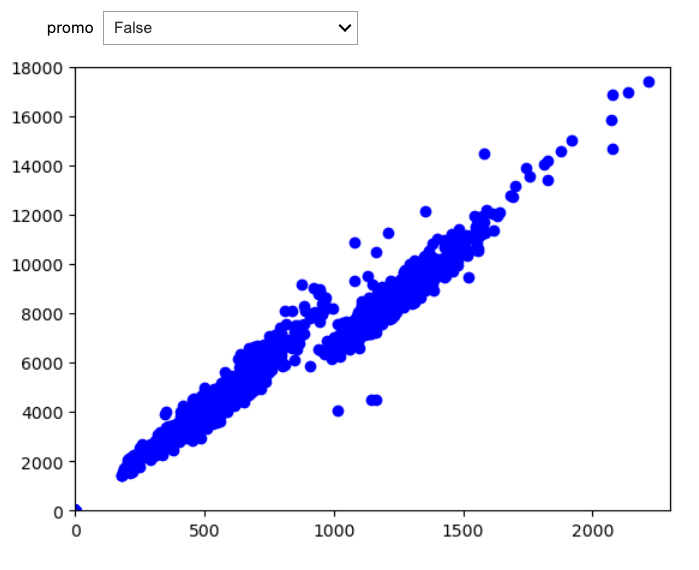

In [32]:


df = pd.read_csv("data.csv")

def plot_scatter(promo):
    color_map = {True: 'red', False: 'blue'}
    plt.figure(figsize=(8, 6))
    
    if promo:
        sns.scatterplot(data=df[df['Promo'] == promo], x='Customers', y='Sales', color=color_map[True])
    else:
        sns.scatterplot(data=df[df['Promo'] == promo], x='Customers', y='Sales', color=color_map[False])
    
    plt.xlim(0, 2300)
    plt.ylim(0, 18000)
    plt.xlabel('Customers')
    plt.ylabel('Sales')
    plt.title(f'Scatterplot mit Promo={promo}')
    plt.show()

promo_dropdown = widgets.Dropdown(options=[True, False], description='Promo:')
interact_output = widgets.interactive(plot_scatter, promo=promo_dropdown)

interact_output


interactive(children=(Dropdown(description='Promo:', options=(True, False), value=True), Output()), _dom_class…